<a href="https://colab.research.google.com/github/Fabiorsi1979/FTC_Analisando_dados/blob/main/MetodoSAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método SAPE, exercícios de Negócio #

In [198]:
from google.colab import drive
import pandas as pd

drive.mount ('/content/drive/')

path = '/content/drive/MyDrive/train.csv'

dados = pd.read_csv(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Limpeza dos Dados

In [199]:
# Conhecendo as colunas
df = dados.copy()

In [200]:
#for i in range (len(df)):
#    df.loc[i,'ID'] = df.loc[i,'ID'].strip()
#    df.loc[i,'Delivery_person_ID'] = df.loc[i,'Delivery_person_ID'].strip()
#    df.loc[i,'Road_traffic_density'] = df.loc[i,'Road_traffic_density'].strip()
#    df.loc[i,'Type_of_order'] = df.loc[i,'Type_of_order'].strip()
#    df.loc[i,'Type_of_vehicle'] = df.loc[i,'Type_of_vehicle'].strip()
#    df.loc[i,'Festival'] = df.loc[i,'Festival'].strip()
#    df.loc[i,'City'] = df.loc[i,'City'].strip()


#Esse código pode ser otimizado substituindo o loop for por métodos vetorizados do pandas,
#o que torna o processamento muito mais rápido ao evitar a iteração linha por linha.
# Em vez de iterar por cada linha e coluna, podemos aplicar .str.strip() diretamente nas colunas.

#Aqui está uma versão otimizada:

# Lista de colunas onde queremos remover espaços em branco
colunas_para_strip = ['ID','Delivery_person_ID','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']

# Aplica .str.strip() em todas as colunas da lista de uma vez
df[colunas_para_strip] = df[colunas_para_strip].apply(lambda x: x.str.strip())

In [201]:
df.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.75,75.89,22.77,75.91,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.91,77.68,13.04,77.81,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.91,77.68,12.92,77.69,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [202]:
colunas = df.columns

for coluna in df.columns:
    display(df[coluna].describe())

,ID
count,45593
unique,45593
top,0x4607
freq,1


,Delivery_person_ID
count,45593
unique,1320
top,PUNERES01DEL01
freq,67


,Delivery_person_Age
count,45593
unique,23
top,35
freq,2262


,Delivery_person_Ratings
count,45593
unique,29
top,4.8
freq,7148


,Restaurant_latitude
count,45593.00
mean,17.02
std,8.19
min,-30.91
25%,12.93
50%,18.55
75%,22.73
max,30.91


,Restaurant_longitude
count,45593.00
mean,70.23
std,22.88
min,-88.37
25%,73.17
50%,75.90
75%,78.04
max,88.43


,Delivery_location_latitude
count,45593.00
mean,17.47
std,7.34
min,0.01
25%,12.99
50%,18.63
75%,22.79
max,31.05


,Delivery_location_longitude
count,45593.00
mean,70.85
std,21.12
min,0.01
25%,73.28
50%,76.00
75%,78.11
max,88.56


,Order_Date
count,45593
unique,44
top,15-03-2022
freq,1192


,Time_Orderd
count,45593
unique,177
top,NaN
freq,1731


,Time_Order_picked
count,45593
unique,193
top,21:30:00
freq,496


,Weatherconditions
count,45593
unique,7
top,conditions Fog
freq,7654


,Road_traffic_density
count,45593
unique,5
top,Low
freq,15477


,Vehicle_condition
count,45593.00
mean,1.02
std,0.84
min,0.00
25%,0.00
50%,1.00
75%,2.00
max,3.00


,Type_of_order
count,45593
unique,4
top,Snack
freq,11533


,Type_of_vehicle
count,45593
unique,4
top,motorcycle
freq,26435


,multiple_deliveries
count,45593
unique,5
top,1
freq,28159


,Festival
count,45593
unique,3
top,No
freq,44469


,City
count,45593
unique,4
top,Metropolitian
freq,34093


,Time_taken(min)
count,45593
unique,45
top,(min) 26
freq,2123


In [203]:
unicas = ['Weatherconditions','Road_traffic_density','Type_of_vehicle','multiple_deliveries','Festival']
for unica in unicas:
    print(df[unica].unique())

['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']
['High' 'Jam' 'Low' 'Medium' 'NaN']
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
['0' '1' '3' 'NaN ' '2']
['No' 'Yes' 'NaN']


In [204]:
for coluna in colunas:
   if df[df =='NaN'][coluna].count() > 0:
        print(coluna, df[df =='NaN'][coluna].count())

Road_traffic_density 601
Festival 228
City 1200


In [205]:
df[df['Weatherconditions'] =='conditions NaN']['Weatherconditions'].count()

616

In [206]:
alterar = colunas
for alterado in alterar:
      moda = df[~df[alterado].isin(['NaN', 'conditions NaN', 'NaN '])][alterado].mode()[0]
      df[alterado] = df[alterado].replace(['NaN', 'conditions NaN', 'NaN '], moda)


In [207]:
for coluna in colunas:
   if df[df =='NaN'][coluna].count() > 0:
        print(coluna, df[df =='NaN'][coluna].count())

df[df['Weatherconditions'] =='conditions NaN']['Weatherconditions'].count()

0

In [208]:
unicas = ['Weatherconditions','Road_traffic_density','Type_of_vehicle','multiple_deliveries','Festival']
for unica in unicas:
    print(df[unica].unique())

['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy']
['High' 'Jam' 'Low' 'Medium']
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
['0' '1' '3' '2']
['No' 'Yes']


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [210]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.75,75.89,22.77,75.91,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.91,77.68,13.04,77.81,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33


In [211]:
df_copy = df.copy()
# Alterando colunas para int
altera_int = ['Delivery_person_Age','Vehicle_condition','multiple_deliveries']
for alt_int in altera_int:
    df_copy[alt_int] = df_copy[alt_int].astype(int)


# Alterando colunas para float
df_copy['Delivery_person_Ratings'] = df_copy['Delivery_person_Ratings'].astype(float)


# Alterando colunas Date
df_copy['Order_Date'] = pd.to_datetime(df['Order_Date'])



<ipython-input-211-ae8fb4989bf7>:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [212]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int64         
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [213]:
# Separando numeros de letras | alterando numeros para int
import re

df_copy = df_copy.reset_index(drop=True)
for i in range (len(df_copy)):
    apenasNum = df_copy.loc[i,'Time_taken(min)']
    apenasNum = re.findall(r'\d+', str(apenasNum))
    df_copy.loc[i,'Time_taken(min)'] = apenasNum[0]

df_copy['Time_taken(min)'] = df_copy['Time_taken(min)'].astype(int)

In [214]:
df_copy.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.90,22.75,75.89,22.77,75.91,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.50,12.91,77.68,13.04,77.81,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33


In [215]:
df= df_copy.copy()
pd.options.display.float_format = '{:.2f}'.format

# Respondendo aos Exercícios

## 1 - Qual o número total de entregadores cadastrados na base de dados?

In [216]:
df['Delivery_person_ID'].nunique()

1320

## 2 - Qual o número total de entregadores únicos cadastrados na base de dados?

Saída -
   - e-mail Número de entregadores únicos

Processo -
   - filtro entregadores ID unicos
   - contar filtro
   
Entrada -
   - usar LOC , unique e count ou Len

In [217]:
len(df['Delivery_person_ID'].unique())

1320

## 3 -Qual a média de idade dos entregadores por cidade?

Saída -
   - e-mail, um gráfico com cidades e média

Processo -
   - agrupar por cidades
   - agrupar por entregadores ID
   - calcular média por idade
   - gerar um gráfico com estas informações

Entrada -
   - groupby - duas colunas cidades e entregadores ID
   - agg  calcular média idade
   - Criar de gráfico de Barras, x= cidades e y = média idade

,Delivery_person_Age
City,
Metropolitian,29.97
Semi-Urban,32.74
Urban,29.11


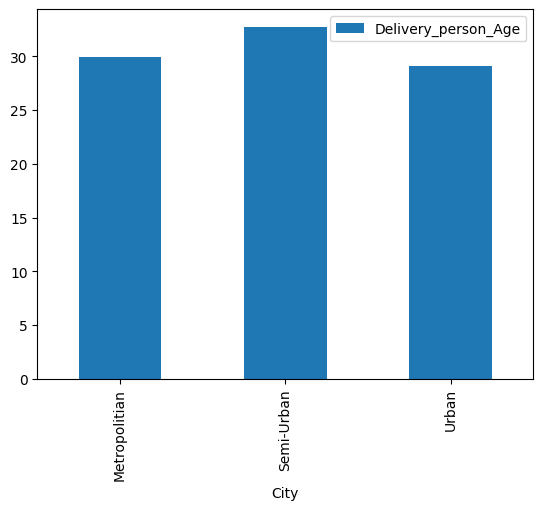

In [218]:
df.groupby(['City']).agg({'Delivery_person_Age':'mean'}).plot.bar()
df.groupby(['City']).agg({'Delivery_person_Age':'mean'})

## 4 -Qual a mediana de idade dos entregadores por cidade?

Saída -
   - e-mail com Gráfico, podendo ser também o telegram
  
Processo -
   - Filtrar cidades
   - Filtar entregadores ID
   - calcular Mediana

Entrada -
   - groupby cidades, entregadoresID
   - agg Mediana
   - Criar Gráfico x=Cidades e Y= Mediana de idades

,Delivery_person_Age
City,
Metropolitian,30.00
Semi-Urban,34.00
Urban,29.00


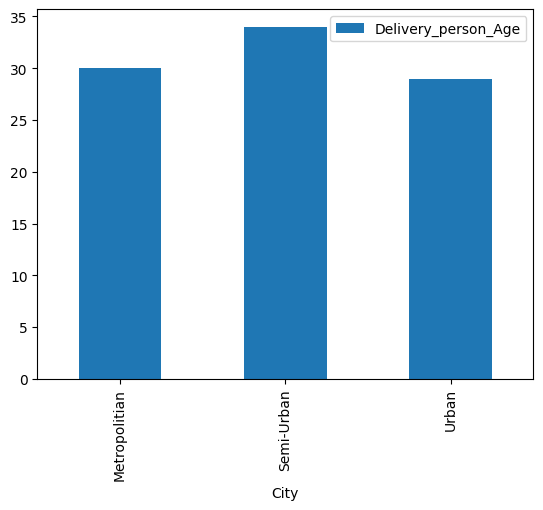

In [219]:
df.groupby(['City']).agg({'Delivery_person_Age':'median'}).plot.bar()
df.groupby(['City']).agg({'Delivery_person_Age':'median'})

## 5 -Qual o número total de entregas feitas por densidade de tráfego?

Saída -
   - grafico por e-mail ou Telegram

Processamento -
   - filtrar por densidade
   - Contar quantidade de Orders Type

Entrada -
   - Groupby com Count, para o gráfico o X= será Densidade de Tráfego e Y= Total de entregas Orders

Road_traffic_density
City          Road_traffic_density                      
Metropolitian High                                  3463
              Jam                                  11381
              Low                                  11869
              Medium                                8580
Semi-Urban    High                                    17
              Jam                                    135
              Low                                      1
              Medium                                  11
Urban         High                                   945
              Jam                                   2627
              Low                                   4208
              Medium                                2356

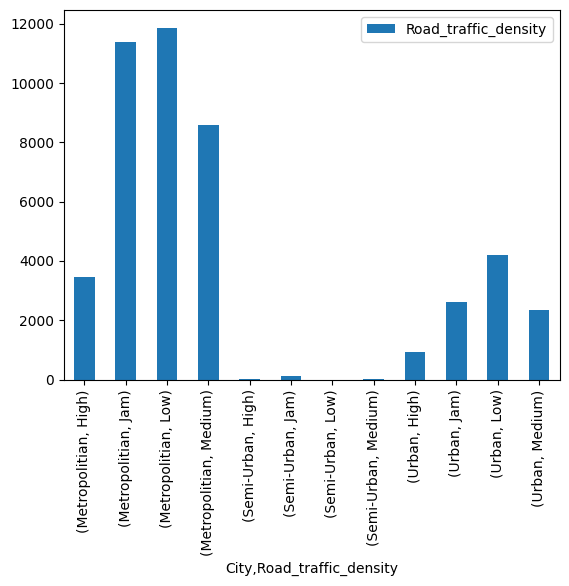

In [220]:
df.groupby(['City','Road_traffic_density']).agg({'Road_traffic_density':'count'}).plot.bar()
df.groupby(['City','Road_traffic_density']).agg({'Road_traffic_density':'count'})

## 6 -Qual a quantidade de entregas feitas por cidade?

Saída -
   - enviar gráfico por e-mail, ou telegram    

Processamento -
   - filtrar por cidades
   - contar quantidade de orders por cidade

Entrada -
   - Groupby por cidade, count por order. X= Cidade e Y=Quant. Entregas feitas
  

,City,multiple_deliveries
City,,
Metropolitian,35293,27106
Semi-Urban,164,244
Urban,10136,6855


------------------------------------------------------------

Foram efetuadas 62399 entregas na cidade de Metropolian
Foram efetuadas 408 entregas na cidade de Semi-Urban
Foram efetuadas 16991 entregas na cidade de Urban



<Axes: xlabel='City'>

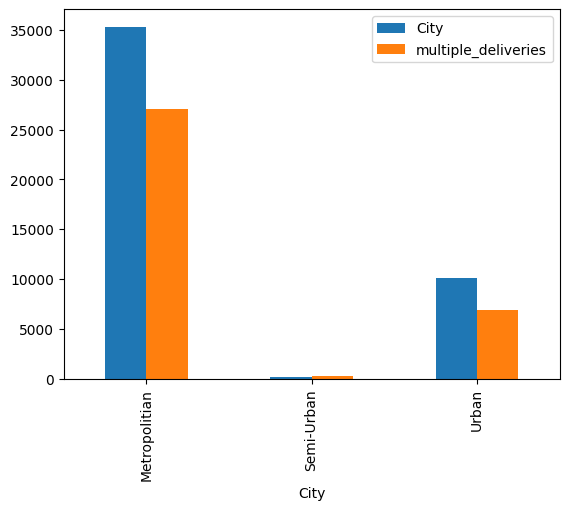

In [221]:
entregas = df.groupby(['City']).agg({'City':'count','multiple_deliveries':'sum'})
display(entregas)
print('-'*60)
lista_aux = {}
print()
colunas = ['Metropolian','Semi-Urban','Urban']
for x in range (3):
    soma= entregas.iloc[x,0]+entregas.iloc[x,1]
    print('Foram efetuadas {} entregas na cidade de {}'.format(soma,colunas[x]))
    lista_aux[colunas[x]] = soma

print()
entregas.plot.bar()


## 7 -Qual a média, mediana e desvio padrão das entregas feitas por cidade e por tipo de veículo?


Saída -
  - Apresentar uma tabela com as informações solicitas, através de e-mail

Processamento -
  - filtrar por cidade,
  - filtrar por tipo de veículo
  - Calcular Média,
  - Calcular a mediana,
  - Calcular o desvio padrão,

Entrada -
  - Groupby, Média., Mediana e desvio padrão usando o AGG

In [222]:
for i in range(len(df)):
    df.loc[i,'Total_Entregas']=df.loc[i,'multiple_deliveries']+1

df['Total_Entregas'] = df['Total_Entregas'].astype(int)

In [223]:
df.groupby(['City','Type_of_vehicle'])['Total_Entregas'].describe()

count  mean  std  min  25%  50%  75%  max
City          Type_of_vehicle                                              
Metropolitian bicycle             55.00  1.76 0.58 1.00 1.00 2.00 2.00 3.00
              electric_scooter  2936.00  1.73 0.54 1.00 1.00 2.00 2.00 4.00
              motorcycle       20700.00  1.80 0.59 1.00 1.00 2.00 2.00 4.00
              scooter          11602.00  1.72 0.54 1.00 1.00 2.00 2.00 4.00
Semi-Urban    electric_scooter     4.00  2.25 1.26 1.00 1.75 2.00 2.50 4.00
              motorcycle         150.00  2.53 1.03 1.00 2.00 2.00 4.00 4.00
              scooter             10.00  2.00 0.82 1.00 2.00 2.00 2.00 4.00
Urban         bicycle             13.00  1.77 0.44 1.00 2.00 2.00 2.00 2.00
              electric_scooter   874.00  1.64 0.51 1.00 1.00 2.00 2.00 3.00
              motorcycle        5585.00  1.70 0.55 1.00 1.00 2.00 2.00 4.00
              scooter           3664.00  1.64 0.52 1.00 1.00 2.00 2.00 4.00

## 8 -Qual a primeira data de entrega por cada cidade?

Saída -
  - Tabela

Processamento -
  - converter a data para Datatime
  - filtrar por cidade
  - localizar a data mais antiga

Entrada -
  - converter Datatime, groupby por cidade, usar o método max, talvez seja uma opção criar uma nova coluna com a informação Data Atual - Data mais Antiga

In [224]:
df.groupby(['City']).agg({'Order_Date':'min'})

,Order_Date
City,
Metropolitian,2022-02-11
Semi-Urban,2022-02-11
Urban,2022-02-11


## 9 - Qual a última data de entrega por cada cidade?

Saída -
   - uma tabela, através de e-mail

Processamento -
   - filtrar por cidade
   - localizar a data de entrega mais recente

Entrada -
   - usar um groupby, com min (existe a possibilidade de criar uma coluna para calcular a dataatual - a data mais recente e identificar o número de dias)


In [225]:
df.groupby(['City']).agg({'Order_Date':'max'})

,Order_Date
City,
Metropolitian,2022-04-06
Semi-Urban,2022-04-06
Urban,2022-04-06


## 10 -Qual a média de avaliações das entregas feitas por condições climáticas?


Saída -
   - Gráfico, e tabela por e-mail

Processamento -
   - filtrar por condições climáticas
   - Calcular a média

Entrada -
   - Groupby, Mean. Sendo x= condições climáticas e y= calculo da média


In [226]:
df.groupby(['Weatherconditions']).agg({'Delivery_person_Ratings':'mean'})

,Delivery_person_Ratings
Weatherconditions,
conditions Cloudy,4.66
conditions Fog,4.66
conditions Sandstorms,4.62
conditions Stormy,4.62
conditions Sunny,4.66
conditions Windy,4.62


## 11 -Qual o valor da avaliação mais baixa feita por tipo de condição climática e por densidade de tráfego?

Saida -
   - Tabela, por e-mail
Processamento -
   - Filtrar condição climática
   - Filtrar densidade do Tráfego
   - Pesquisar o menor valor de avaliação
Entrada -
   - Groupby, Min

In [227]:
df.groupby(['Weatherconditions','Road_traffic_density']).agg({'Delivery_person_Ratings':'min'})

Delivery_person_Ratings
Weatherconditions     Road_traffic_density                         
conditions Cloudy     High                                     4.00
                      Jam                                      4.00
                      Low                                      3.50
                      Medium                                   4.00
conditions Fog        High                                     4.00
                      Jam                                      4.00
                      Low                                      1.00
                      Medium                                   4.00
conditions Sandstorms High                                     4.00
                      Jam                                      3.50
                      Low                                      4.00
                      Medium                                   3.50
conditions Stormy     High                                     4.00
                      Jam                                      3.50
                      Low                                      4.00
                      Medium                                   3.50
conditions Sunny      High                                     3.50
                      Jam                                      3.50
                      Low                                      2.50
                      Medium                                   4.00
conditions Windy      High                                     4.00
                      Jam                                      3.50
                      Low                                      4.00
                      Medium                                   3.50

## 12 -Qual a média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos?


Saida -
   - Tabela, email

Processamento -
   - filtrar tipo de condições
   
Entrada -
   - Groupby, Agg Média, Mediaa e Desvio Padrão - campo avaliação
  

In [228]:
df.groupby(['Vehicle_condition'])['Delivery_person_Ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle_condition,,,,,,,,
0,15009.00,4.62,0.29,3.00,4.50,4.70,4.80,5.00
1,15030.00,4.65,0.32,2.50,4.60,4.70,4.90,5.00
2,15034.00,4.65,0.32,2.50,4.60,4.70,4.90,5.00
3,520.00,4.64,1.09,1.00,4.80,4.80,4.80,6.00


## 13 -Quantas entregas foram feitas no Festival?

Saida -
  - Estilo Cartão, e-mail

Processamento -
  - filtro, festival yes
  - contagem de orders

Entrada -
  - filter, Count



In [233]:
df.loc[df['Festival']=='Yes']['Total_Entregas'].sum()

77727

## 14 -Qual a avaliação média das entregas feitas no Festival?

Saida -
  - Cartão, e-mail

Processamento -
   - filtrar, festival Yes
   - Calcular a média campo avaliação

Entrada -
   - filter, Mean

In [234]:
df.loc[df['Festival']=='Yes']['Delivery_person_Ratings'].mean()

4.507142857142857

## 15 -Qual a menor avaliação feita em uma entrega no Festival e por cidade?

Saida -
  - Cartão, e-mail

Processamento -
   - filtrar, festival Yes
   - filtrar por cidade
   - Pesquisar a menor avaliação

Entrada -
   - filter, groupby e min

In [250]:
periodoFestival = df[df['Festival']=='Yes']
periodoFestival.groupby('City').agg({'Delivery_person_Ratings':'min'})

,Delivery_person_Ratings
City,
Metropolitian,1.00
Semi-Urban,3.50
Urban,2.50


## 16 -Qual a maior avaliação feita por tipo de pedido?


Saida -
  - Cartão, e-mail

Processamento -
   - filtrar, festival Yes
   - filtrar por cidade
   - Pesquisar a maior avaliação

Entrada -
   - filter, groupby e max

In [251]:
df.groupby(['Type_of_order']).agg({'Delivery_person_Ratings':'max'})

,Delivery_person_Ratings
Type_of_order,
Buffet,6.00
Drinks,6.00
Meal,6.00
Snack,6.00


In [252]:
df.groupby(['Type_of_order'])['Delivery_person_Ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
Type_of_order,,,,,,,,
Buffet,11280.00,4.64,0.33,1.00,4.60,4.70,4.80,6.00
Drinks,11322.00,4.64,0.33,1.00,4.50,4.70,4.80,6.00
Meal,11458.00,4.64,0.33,1.00,4.50,4.70,4.80,6.00
Snack,11533.00,4.64,0.33,1.00,4.60,4.70,4.80,6.00


## 17 -Qual a idade do entregador mais velho da planilha de dados?

Saida -
   - Cartão, e-mail

Processamento -
   - pesquisar idade dos entregadores

Entrada -
   - MAX

In [257]:
df['Delivery_person_Age'].max()

50

## 18 -Qual a idade do entregador mais novo da planilha de dados?

Saida -
   - Cartão, e-mail

Processamento -
   - pesquisar idade dos entregadores

Entrada -
   - MIN

In [258]:
df['Delivery_person_Age'].min()

15

## 19 -Quantas entregas foram feitas em cada condição climática?

Saida -
  - Gráfico, e-mail

Processamento -
  - Filtrar condições climáticas
  - Contagem das orders

Entrada -
  - Gropby, count

In [259]:
df.groupby(['Weatherconditions']).agg({'Total_Entregas':'sum'})

,Total_Entregas
Weatherconditions,
conditions Cloudy,13622
conditions Fog,14956
conditions Sandstorms,12971
conditions Stormy,13222
conditions Sunny,12085
conditions Windy,12942


## 20 -Quantas entregas foram feitas em cada tipo de densidade de trânsito?

Saida -
   - Grafico, e-mail

Processamento -
   - filtrar densidade de transito
   - contar quantidade de entregas

Entrada -
   - groupby e count

In [260]:
df.groupby(['Road_traffic_density']).agg({'Total_Entregas':'sum'})

,Total_Entregas
Road_traffic_density,
High,7855
Jam,26352
Low,26419
Medium,19172
